# Sports scheduling
Adapted from https://github.com/timnon/pyschedule/blob/master/examples/sports-scheduling.ipynb

In [7]:
%matplotlib widget
import processscheduler as ps

In [8]:
# set input size to 5 just for readability, increasing up to 10
# to get a solution in a reasonable time
n_teams = 5  # Number of teams
n_fields = int(n_teams / 2)  # Num of fields
# the minimal number of rounds will be computed by the solver
pb = ps.SchedulingProblem(name="SportsScheduling")

In [9]:
# Game tasks
Games = {
    (i, j): ps.FixedDurationTask(name="Game_%i_%i" % (i, j), duration=1)
    for i in range(n_teams)
    for j in range(n_teams)
    if i < j
}

# Team and field resources
Teams = [ps.Worker(name="Team_%i" % i) for i in range(n_teams)]
Fields = [ps.Worker(name="Field_%i" % i) for i in range(n_fields)]

# Resource requirements
for i, j in Games:
    Games[i, j].add_required_resources([Teams[i], Teams[j]])
    Games[i, j].add_required_resource(
        ps.SelectWorkers(list_of_workers=Fields, nb_workers_to_select=1)
    )

In [10]:
# Look for the shortest schedule
ps.ObjectiveMinimizeMakespan()

MinimizeMakeSpan(<class 'processscheduler.objective.ObjectiveMinimizeMakespan'>)
0 assertion(s):

Solver type:
	-> Standard SAT/SMT solver
Incremental optimizer:
	Found value: 10 elapsed time:0.030s
	Checking better value < 10
	Found value: 9 elapsed time:0.050s
	Checking better value < 9
	Found value: 8 elapsed time:0.053s
	Checking better value < 8
	Found value: 7 elapsed time:0.073s
	Checking better value < 7
	Found value: 6 elapsed time:0.078s
	Checking better value < 6
	Found value: 5 elapsed time:0.090s
	Checking better value < 5
	Can't find a better solution for problem SportsScheduling.

	Found optimum 5. Stopping iteration.
	total number of iterations: 7
	value: 5
	SportsScheduling satisfiability checked in 0.09s


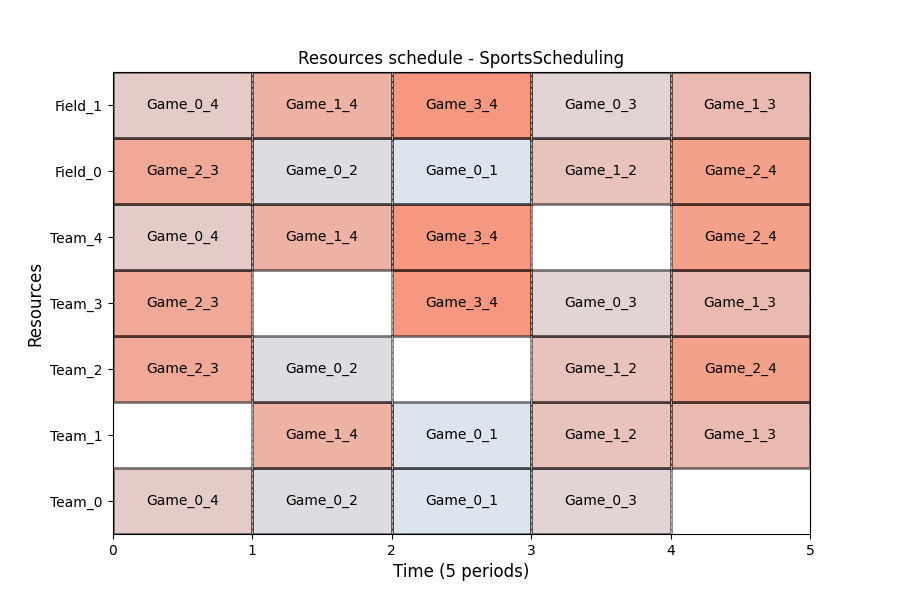

In [11]:
solver = ps.SchedulingSolver(problem=pb)
solution = solver.solve()
ps.render_gantt_matplotlib(solution)